# Prediction using Supervised ML 

## Simple Linear Regression

Simple linear regression is a linear regression model with a single explanatory variable.That is, it concerns two-dimensional sample points with one independent variable and one dependent variable  that, as accurately as possible, predicts the dependent variable values as a function of the independent variable. 

### Author : Sayanth R Nath

In [3]:
#Importing the libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [9]:
# Reading data 
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Now let us plot a graph and try to find relationship between the variables !

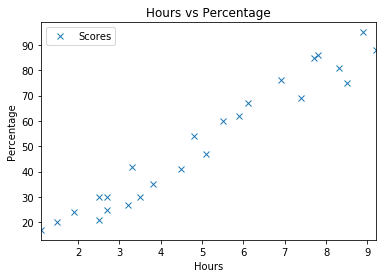

In [10]:
data.plot(x='Hours', y='Scores', style='x')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours')  
plt.ylabel('Percentage')  
plt.show()

### We now understand that there is a linear relationship between the variables 'Hours' and 'Percentage'

#### Let us now plot the histogram of both the parameters!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd66aeb9210>]],
      dtype=object)

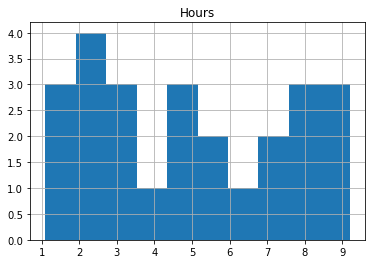

In [18]:
data.hist('Hours')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd66afb33d0>]],
      dtype=object)

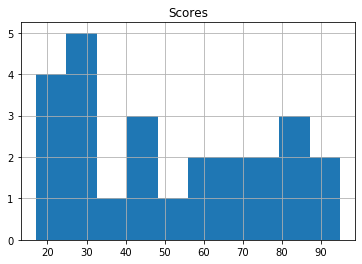

In [16]:
data.hist('Scores')

## Data Preparation

In [63]:
X=data.iloc[:, :-1].values
y=data.iloc[:,1].values

### The next step is to split this data into training and test sets

In [64]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=0) 

In [65]:
X_train

array([[7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

## Training

In [69]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression(fit_intercept=True,normalize=False)
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

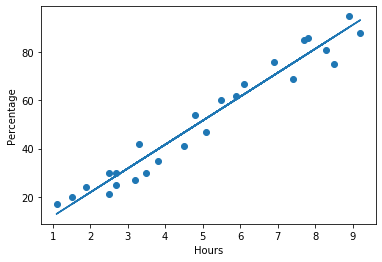

In [73]:
# Plotting the regression line
regressionline = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, regressionline)
plt.xlabel('Hours')  
plt.ylabel('Percentage')
plt.show()

## Predicting the output

In [75]:
y_pred = lr.predict(X_test)

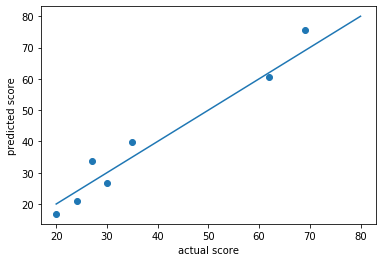

In [81]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual score')  
plt.ylabel('predicted score')
plt.plot([20, 40, 60, 80], [20, 40, 60, 80])
plt.show()

### We can create a dataframe by using the actual and predicted values!


In [84]:
df = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})  
df 

,Actual Score,Predicted Score
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


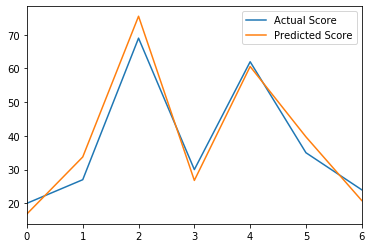

In [85]:
df.plot()

We get almost similar results while predicting the scores in the testing set.
Now we can predict using any given 'Hours' Value

In [103]:
n = 9.25
predict=lr.predict(np.array([n]).reshape((-1,1)) )
print("No of Hours = {}".format(n))
print("Predicted Score = {}".format(predict[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341652


### Evaluation

The final step is to evaluate the performance of algorithm

In [120]:
from sklearn import metrics  

In [127]:
print('R-squared value:', 
      metrics.r2_score(y_test, y_pred,)) 

R-squared value: 0.9367661043365056


In [116]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.130879918502482


In [126]:
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 

Mean Squared Error: 20.33292367497996
